In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from extraction import findSVOs
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [19]:
def create_graph(final_nodes):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    if(len(edge)==0 or len(final_nodes)==0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G, edge_labels

In [20]:
def load_text(file_name):
    with open(file_name, 'r') as file:
        text = file.read()
    sentences = sent_tokenize(text)
    return sentences


Graph generated


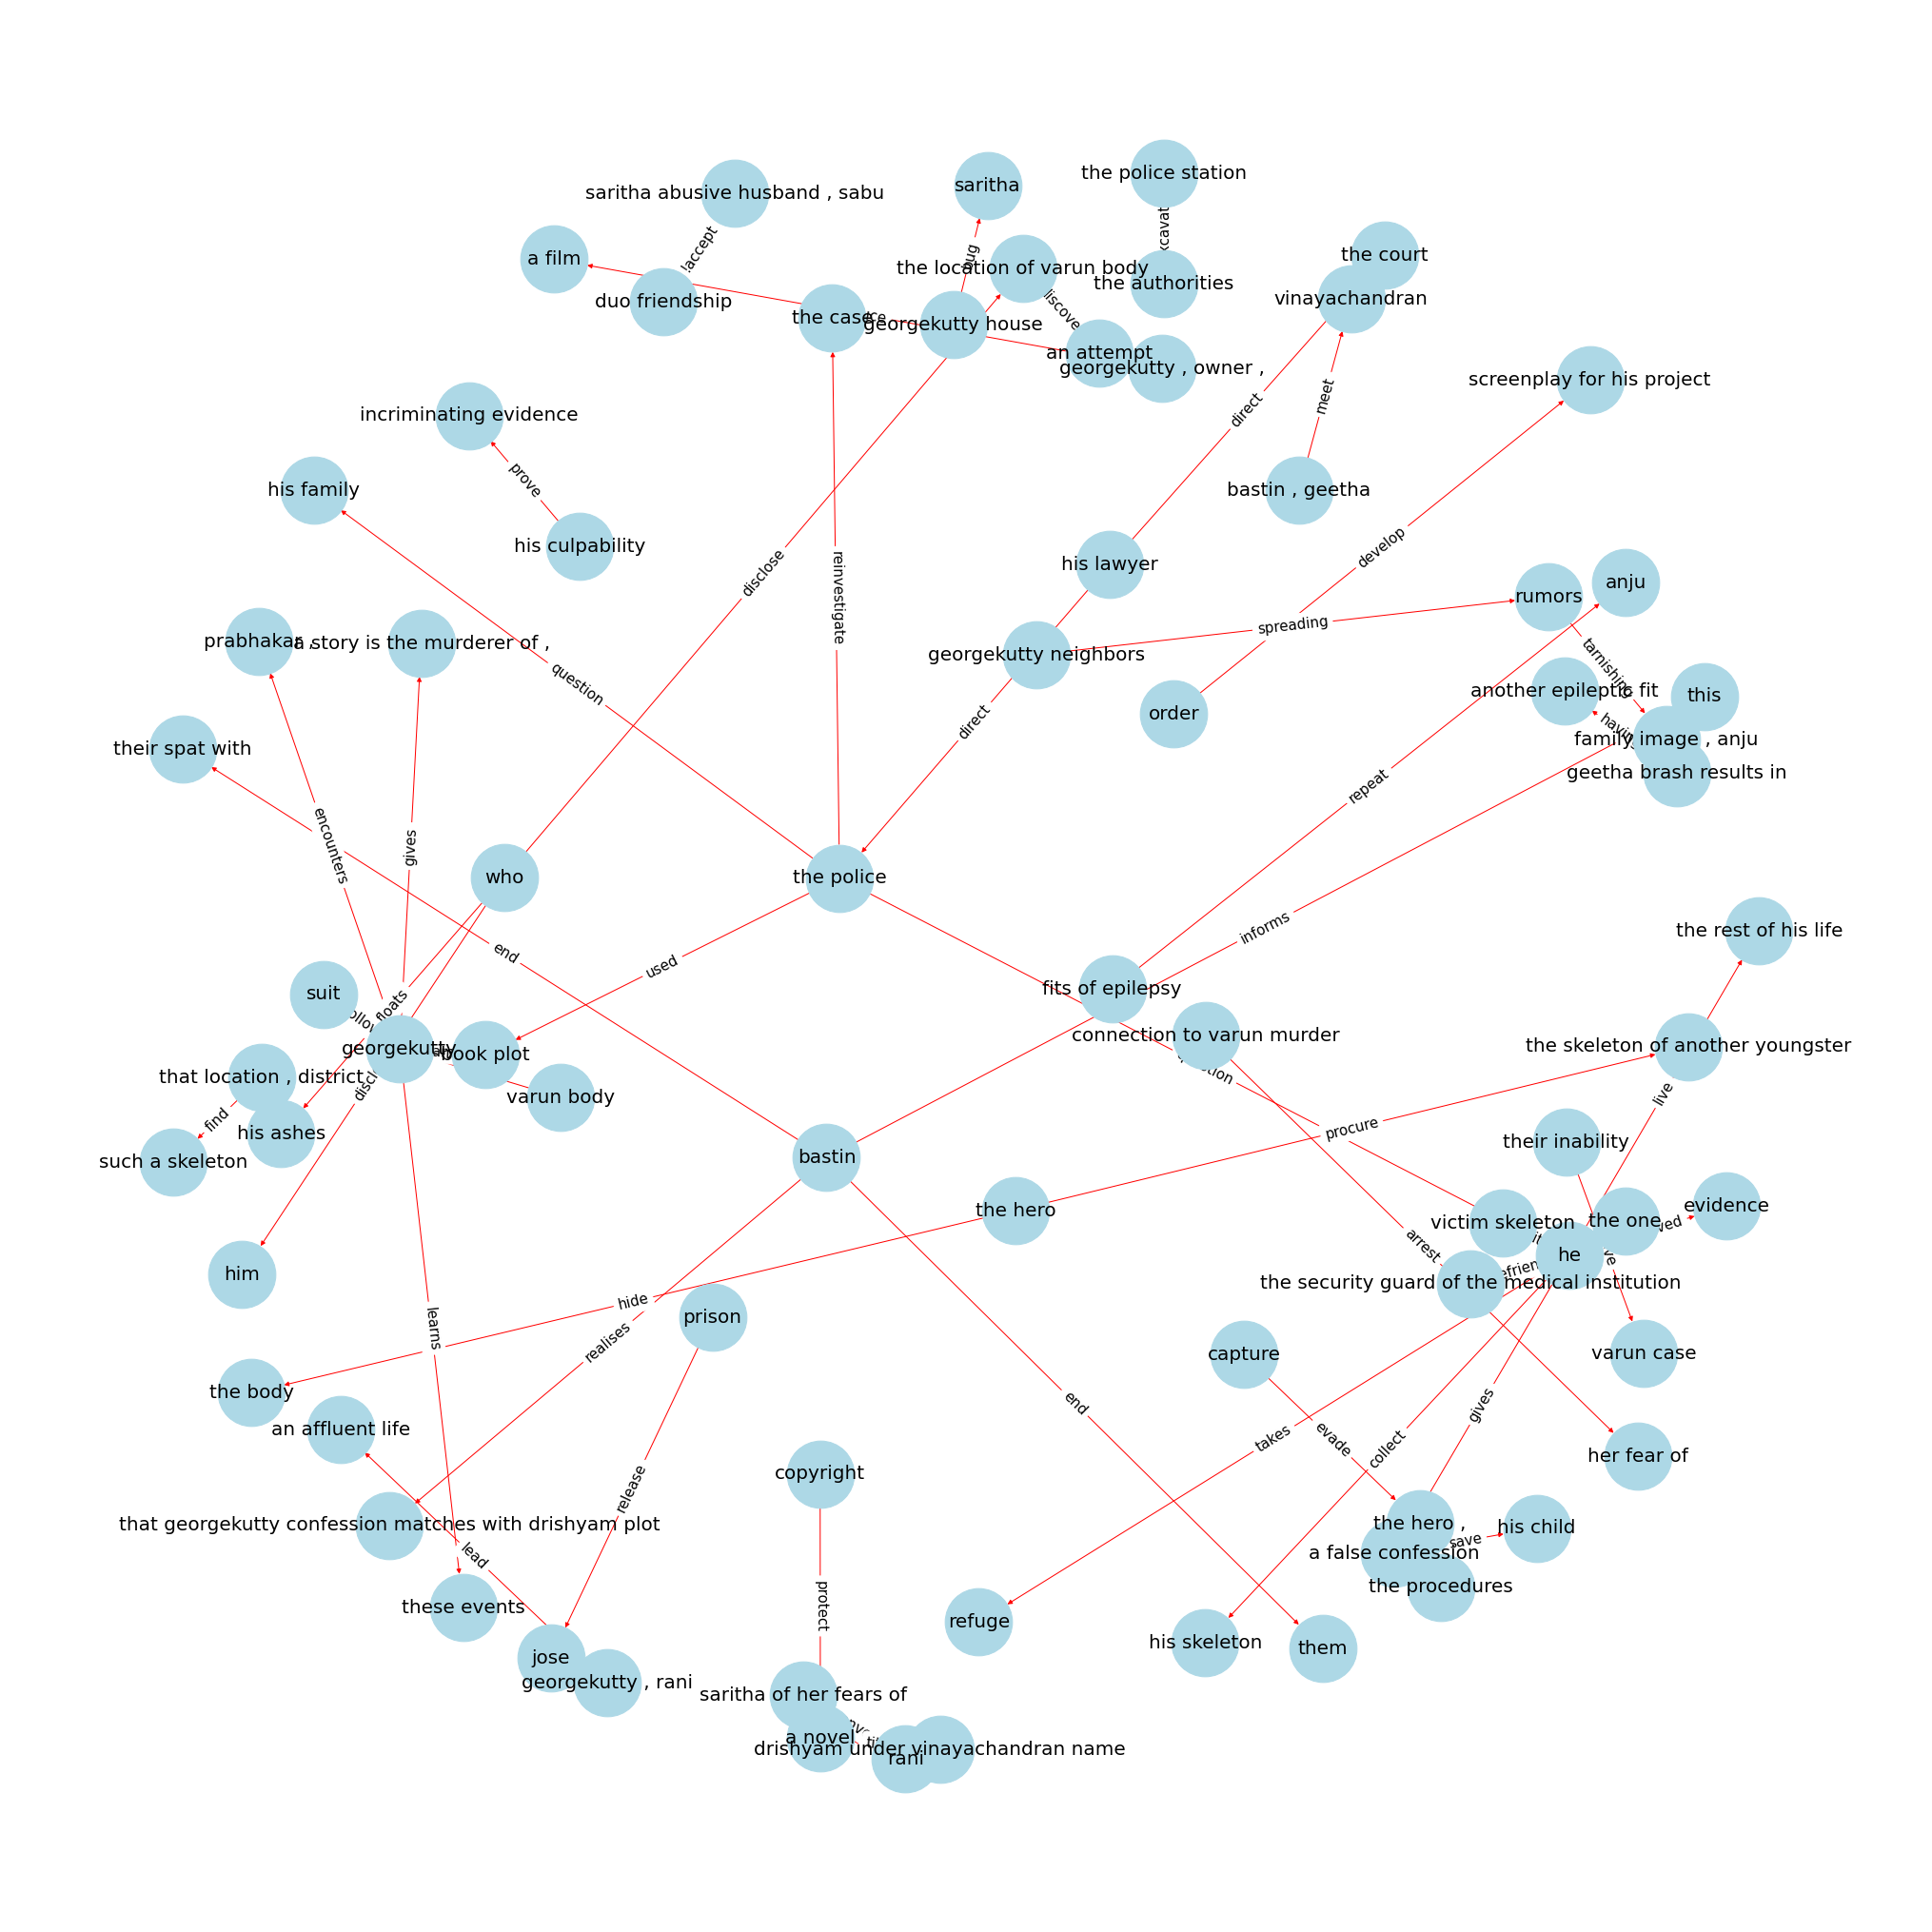

In [22]:
file_name = 'text1'

sentences = load_text('data/' + file_name + '.txt')

nodes = []
final_nodes = []

for sentence in sentences: 
    tokens = nlp(sentence)
    svos = findSVOs(tokens)
    nodes.append(svos)
    
for i in nodes:
    for j in i:
        if(len(j) == 3):
            final_nodes.append(j)
                
g = create_graph(final_nodes)
plt.savefig('images/' + file_name + '-graph.png')

In [23]:
print(g)

(<networkx.classes.digraph.DiGraph object at 0x7fd036418a30>, {('he', 'refuge'): 'takes', ('he', 'his skeleton'): 'collect', ('he', 'evidence'): 'preserved', ('he', 'a false confession'): 'gives', ('he', 'the rest of his life'): 'live', ('the police', 'he'): 'question', ('the police', 'the case'): 'reinvestigate', ('the police', 'his family'): 'question', ('the police', 'book plot'): 'used', ('georgekutty , rani', 'an affluent life'): 'lead', ('georgekutty , owner ,', 'a film'): 'produce', ('order', 'screenplay for his project'): 'develop', ('fits of epilepsy', 'anju'): 'repeat', ('connection to varun murder', 'her fear of'): 'arrest', ('georgekutty neighbors', 'rumors'): 'spreading', ('rumors', 'family image , anju'): 'tarnishing', ('saritha abusive husband , sabu', 'duo friendship'): '!accept', ('their inability', 'varun case'): 'solve', ('georgekutty', 'prabhakar ,'): 'encounters', ('georgekutty', 'these events'): 'learns', ('georgekutty', 'a story is the murderer of ,'): 'gives', (